In [5]:
import os
from matplotlib import pyplot as plt 
%matplotlib inline

In [6]:
ds_path = "D:\\skripsi\\archive\\hawar"
img_files = os.listdir(ds_path)

In [7]:
import pandas as pd
import cv2
import numpy as np
import mahotas as mt

def create_dataset():
    names = ['mean_r', 'mean_g', 'mean_b', 'stddev_r', 'stddev_g', 'stddev_b', 
             'contrast', 'correlation', 'inverse_difference_moments', 'entropy']
    df = pd.DataFrame(columns=names)
    
    for file in img_files:
        imgpath = ds_path + "\\" + file
        main_img = cv2.imread(imgpath)
        
        # Preprocessing
        img = cv2.cvtColor(main_img, cv2.COLOR_BGR2RGB)
        gs = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
        blur = cv2.GaussianBlur(gs, (25, 25), 0)
        ret_otsu, im_bw_otsu = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
        kernel = np.ones((50, 50), np.uint8)
        closing = cv2.morphologyEx(im_bw_otsu, cv2.MORPH_CLOSE, kernel)
        
        # Color features
        red_channel = img[:, :, 0]
        green_channel = img[:, :, 1]
        blue_channel = img[:, :, 2]
        blue_channel[blue_channel == 255] = 0
        green_channel[green_channel == 255] = 0
        red_channel[red_channel == 255] = 0
        
        red_mean = np.mean(red_channel)
        green_mean = np.mean(green_channel)
        blue_mean = np.mean(blue_channel)
        
        red_std = np.std(red_channel)
        green_std = np.std(green_channel)
        blue_std = np.std(blue_channel)
        
        # Texture features
        textures = mt.features.haralick(gs)
        ht_mean = textures.mean(axis=0)
        contrast = ht_mean[1]
        correlation = ht_mean[2]
        inverse_diff_moments = ht_mean[4]
        entropy = ht_mean[8]
        
        vector = [red_mean, green_mean, blue_mean, red_std, green_std, blue_std,
                  contrast, correlation, inverse_diff_moments, entropy]
        
        df_temp = pd.DataFrame([vector], columns=names)
        df = pd.concat([df, df_temp], ignore_index=True)
        print(file)
    
    return df


In [8]:
dataset = create_dataset()

C:\Users\ACER\AppData\Local\Temp\ipykernel_21184\1712036110.py:51: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, df_temp], ignore_index=True)


blas_ 84.png
blas_1.png
blas_10.png
blas_100.png
blas_101.png
blas_102.png
blas_103.png
blas_104.png
blas_105.png
blas_106.png
blas_107.png
blas_108.png
blas_109.png
blas_11.png
blas_110.png
blas_111.png
blas_112.png
blas_113.png
blas_114.png
blas_115.png
blas_116.png
blas_117.png
blas_118.png
blas_119.png
blas_12.png
blas_120.png
blas_13.png
blas_14.png
blas_15.png
blas_16.png
blas_17.png
blas_18.png
blas_19.png
blas_2.png
blas_20.png
blas_21.png
blas_22.png
blas_23.png
blas_24.png
blas_25.png
blas_26.png
blas_27.png
blas_28.png
blas_29.png
blas_3.png
blas_30.png
blas_31.png
blas_32.png
blas_33.png
blas_34.png
blas_35.png
blas_36.png
blas_37.png
blas_38.png
blas_39.png
blas_4.png
blas_40.png
blas_41.png
blas_42.png
blas_43.png
blas_44.png
blas_45.png
blas_46.png
blas_47.png
blas_48.png
blas_49.png
blas_5.png
blas_50.png
blas_51.png
blas_52.png
blas_53.png
blas_54.png
blas_55.png
blas_56.png
blas_57.png
blas_58.png
blas_59.png
blas_6.png
blas_60.png
blas_61.png
blas_62.png
blas_63.png


In [9]:
dataset.shape

(360, 10)

In [10]:
type(dataset)

pandas.core.frame.DataFrame

In [11]:
dataset.to_csv("hawar.csv")

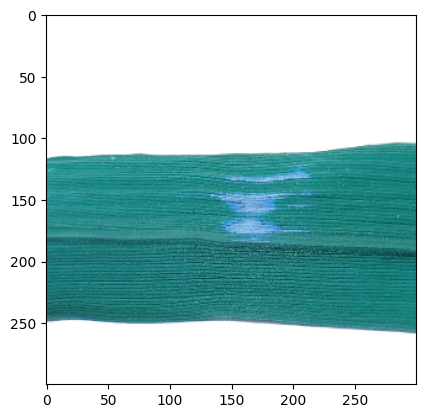

Matriks R, G, dan B berhasil disimpan ke file 'output_rgb.xlsx'.


In [12]:
import cv2
import pandas as pd
import matplotlib.pyplot as plt

# Membaca gambar
citra = cv2.imread("D:\\skripsi\\archive\\hawar\\hawar_150.png")

# Memastikan gambar berhasil dibaca
if citra is None:
    print("Error: File gambar tidak ditemukan atau tidak dapat dibaca.")
else:
    # Mengubah ukuran gambar menjadi 300x300 piksel
    resized_image = cv2.resize(citra, (300, 300))
    
    # Menampilkan gambar yang telah diubah ukurannya
    plt.imshow(resized_image, cmap="Greys_r")
    plt.show()  # Menampilkan gambar dalam jendela Matplotlib
    
    # Memisahkan komponen warna B, G, dan R dari gambar yang telah diubah ukurannya
    blue = resized_image[:, :, 0]
    green = resized_image[:, :, 1]
    red = resized_image[:, :, 2]
    
    # Mengatur nilai 255 pada masing-masing channel menjadi 0
    blue[blue == 255] = 0
    green[green == 255] = 0
    red[red == 255] = 0

    # Konversi matriks ke DataFrame
    blue_df = pd.DataFrame(blue)
    green_df = pd.DataFrame(green)
    red_df = pd.DataFrame(red)

    # Menyimpan DataFrame ke file Excel
    with pd.ExcelWriter("output_rgb.xlsx", engine='openpyxl') as writer:
        blue_df.to_excel(writer, sheet_name='Blue', index=False)
        green_df.to_excel(writer, sheet_name='Green', index=False)
        red_df.to_excel(writer, sheet_name='Red', index=False)

    print("Matriks R, G, dan B berhasil disimpan ke file 'output_rgb.xlsx'.")
